## Observations and Insights 

From the following visualizations, we are able to infer a few things about this drug trial. Firstly, it is pretty clear that the average volume of the tumors and the mass of the experimental subject are strongly, positively correlated. Using our linear regression on the plot of the mice's mass and the average tumor volume, we find that the tumor volume increases at a rate of 0.95 mm^3/g with an r-squared value of 0.71 which indicates a strong correlation.

Additionally, it is apparent that the mice which were on the Capomulin and Ramicane regimens had much lower Tumor Volumes on a whole than those on Infubinol and Ceftamin. For both of these regimens, the lower bounds of the data was significantly lower than the Infubinol and Ceftamin data with only a single outlier in the Infubinol data being close to the median of either regimen.

A possible fault in the experimental study that we can identify from this data is an inconsistency in the number of observations each mouse was given. The number of observations for each experimental subject ranged from 10 all the way down to just one, mouse b447 being an example of a subject only given a single observation. As we saw by looking at how subject s185's Tumor Volume changed over time, it is possible that these subjects could have seen a similar change in volume which would affect our calculated average Tumor Volume. In the future, it may be better to exclude mice with such low observations in order to make our data more consistent.

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
mouse_study_data = mouse_metadata.merge(study_results, on = "Mouse ID")
# Display the data table for preview
mouse_study_data.head(10)

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
5,k403,Ramicane,Male,21,16,25,33.464577,1
6,k403,Ramicane,Male,21,16,30,31.099498,1
7,k403,Ramicane,Male,21,16,35,26.546993,1
8,k403,Ramicane,Male,21,16,40,24.365505,1
9,k403,Ramicane,Male,21,16,45,22.050126,1


In [2]:
# Checking the number of mice.
print(f"There are {len(mouse_study_data['Mouse ID'].unique())} unique mice IDs in this dataset.")

There are 249 unique mice IDs in this dataset.


In [3]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
duplicate_id = []

for ids in mouse_study_data['Mouse ID'].unique():
    id_df = mouse_study_data.loc[mouse_study_data["Mouse ID"] == ids]
    
    if len(id_df['Timepoint']) > len(id_df['Timepoint'].unique()):
        duplicate_id.append(ids)
print(duplicate_id)

['g989']


In [4]:
# Optional: Get all the data for the duplicate mouse ID.
duplicate_df = []
for ids in duplicate_id:
    duplicate_df.append(mouse_study_data.loc[mouse_study_data["Mouse ID"] == ids])
duplicate_df = pd.concat(duplicate_df)
duplicate_df.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
908,g989,Propriva,Female,21,26,0,45.000000,0
909,g989,Propriva,Female,21,26,0,45.000000,0
910,g989,Propriva,Female,21,26,5,48.786801,0
911,g989,Propriva,Female,21,26,5,47.570392,0
912,g989,Propriva,Female,21,26,10,51.745156,0


In [5]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
mouse_study_clean = mouse_study_data
for ids in duplicate_id:
    mouse_study_clean = mouse_study_clean.drop(mouse_study_clean.loc[mouse_study_data['Mouse ID'] == ids].index)
mouse_study_clean.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [6]:
# Checking the number of mice in the clean DataFrame.
print(f"There are {len(mouse_study_clean['Mouse ID'].unique())} unique mice IDs in this dataset without duplicate Timepoint values.")

There are 248 unique mice IDs in this dataset without duplicate Timepoint values.


## Summary Statistics

In [7]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary dataframe.
regimen = mouse_study_clean.groupby(['Drug Regimen'])
reg_mean = regimen['Tumor Volume (mm3)'].mean()
reg_med = regimen['Tumor Volume (mm3)'].median()
reg_var = regimen['Tumor Volume (mm3)'].var()
reg_std = regimen['Tumor Volume (mm3)'].std()
reg_sem = regimen['Tumor Volume (mm3)'].sem()
regimen_df = pd.DataFrame({'Drug Regimen': mouse_study_clean['Drug Regimen'].unique(),
                          'Tumor Volume Mean (mm3)': reg_mean,
                          'Tumor Volume Median (mm3)':reg_med,
                          'Tumor Volume Variance (mm3)^2':reg_var,
                          'Tumor Volume Standard Deviation (mm3)':reg_std,
                          'Tumor Volume Standard Error of the Mean (mm3)': reg_sem})
regimen_df

,Drug Regimen,Tumor Volume Mean (mm3),Tumor Volume Median (mm3),Tumor Volume Variance (mm3)^2,Tumor Volume Standard Deviation (mm3),Tumor Volume Standard Error of the Mean (mm3)
Drug Regimen,,,,,,
Capomulin,Ramicane,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,Capomulin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,Placebo,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,Ceftamin,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,Stelasyn,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,Zoniferol,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,Ketapril,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,Propriva,54.233149,52.431737,59.450562,7.710419,0.573111


In [8]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Using the aggregation method, produce the same summary statistics in a single line
mouse_study_clean.groupby(['Drug Regimen']).agg({'Tumor Volume (mm3)':['mean', 'median' ,'var', 'std', 'sem']})

Tumor Volume (mm3)                                          
                           mean     median        var       std       sem
Drug Regimen                                                             
Capomulin             40.675741  41.557809  24.947764  4.994774  0.329346
Ceftamin              52.591172  51.776157  39.290177  6.268188  0.469821
Infubinol             52.884795  51.820584  43.128684  6.567243  0.492236
Ketapril              55.235638  53.698743  68.553577  8.279709  0.603860
Naftisol              54.331565  52.509285  66.173479  8.134708  0.596466
Placebo               54.033581  52.288934  61.168083  7.821003  0.581331
Propriva              52.320930  50.446266  43.852013  6.622085  0.544332
Ramicane              40.216745  40.673236  23.486704  4.846308  0.320955
Stelasyn              54.233149  52.431737  59.450562  7.710419  0.573111
Zoniferol             53.236507  51.818479  48.533355  6.966589  0.516398

## Bar and Pie Charts

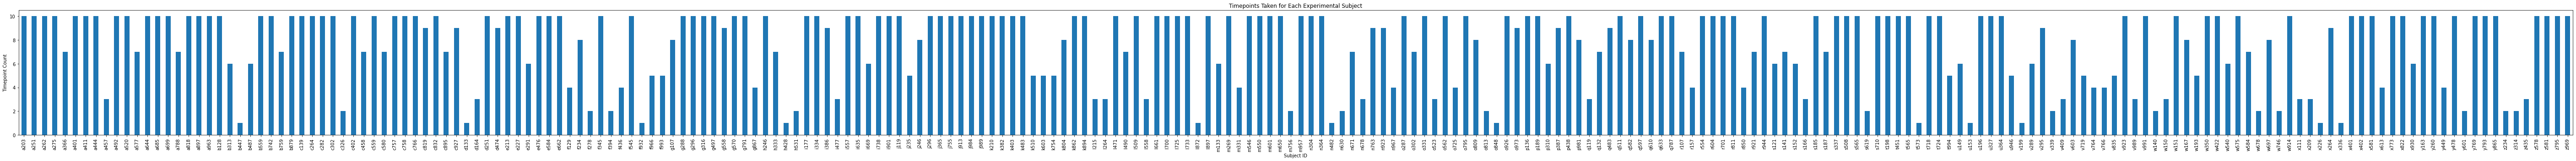

In [9]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using Pandas.
timepoints = mouse_study_clean.groupby(['Mouse ID'])['Timepoint'].count()
mice_id = np.sort(mouse_study_clean['Mouse ID'].unique())

time_df = pd.DataFrame({'Mouse ID': mice_id, 'Timepoints': timepoints})
time_df.plot(kind = 'bar', x = 'Mouse ID', y = 'Timepoints', figsize = (100, 5), 
             legend = False, xlabel = 'Subject ID', ylabel = 'Timepoint Count')
plt.margins(x=0)
plt.title('Timepoints Taken for Each Experimental Subject')
plt.tight_layout
plt.show()


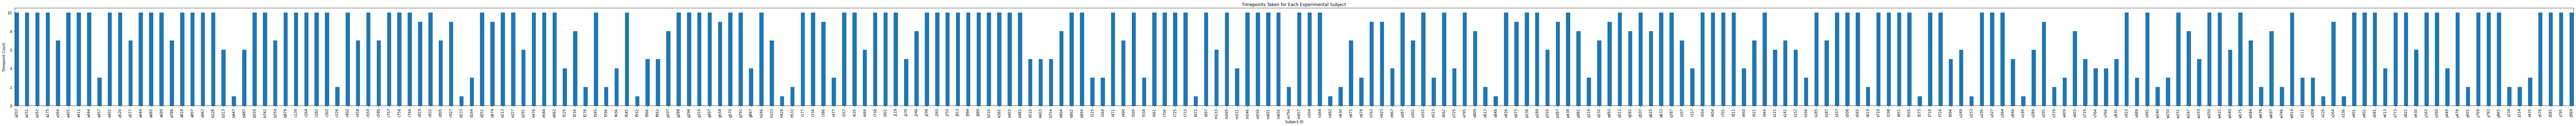

In [18]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using pyplot.
time_ticks = np.arange(len(time_df))
tick_locations = [value for value in time_ticks]

plt.figure(figsize=(100,5))

plt.bar(time_df['Mouse ID'], time_df['Timepoints'], width = 0.4)
plt.margins(x=0)
plt.xticks(tick_locations, time_df['Mouse ID'], rotation = 90)
plt.xlabel('Subject ID')
plt.ylabel('Timepoint Count')
plt.title('Timepoints Taken for Each Experimental Subject')
plt.tight_layout()
plt.show()


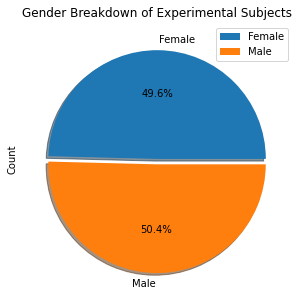

In [11]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas

gender_group = mouse_study_clean.groupby(['Sex'])['Mouse ID'].unique()
gender_count = [len(gender_group[gender]) for gender in range(len(gender_group))]
gender_df = pd.DataFrame({'Count': gender_count}, index = np.sort(mouse_study_clean['Sex'].unique()))

explode = [0,.05]
gender_df.plot(kind = 'pie', y = 'Count', figsize = (5,5), explode = explode, shadow = True, autopct="%1.1f%%")
plt.title('Gender Breakdown of Experimental Subjects')
plt.show()

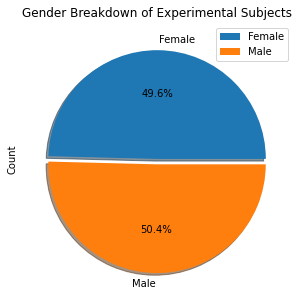

In [12]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
plt.figure(figsize=(5,5))
plt.pie(gender_df['Count'], explode = explode, labels = gender_df.index, shadow = True, autopct="%1.1f%%")
plt.ylabel('Count')
plt.title('Gender Breakdown of Experimental Subjects')
plt.legend()
plt.show()

## Quartiles, Outliers and Boxplots

In [57]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse
regimen_list = ['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin']
timepoint_gb = mouse_study_clean.loc[mouse_study_clean['Drug Regimen'].isin(regimen_list)].groupby(['Mouse ID'])
max_tp = timepoint_gb['Timepoint'].max()
# Merge this group df with the original dataframe to get the tumor volume at the last timepoint
max_tp_df = mouse_study_clean.merge(max_tp, how = 'inner', on = 'Mouse ID')
max_tp_df = max_tp_df.loc[max_tp_df['Timepoint_x'] == max_tp_df['Timepoint_y']]
max_tp_df = max_tp_df.drop(columns = ['Timepoint_y'])
max_tp_df = max_tp_df.rename(columns = {'Timepoint_x': 'Timepoint'})
max_tp_df

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
9,k403,Ramicane,Male,21,16,45,22.050126,1
19,s185,Capomulin,Female,3,17,45,23.343598,1
29,x401,Capomulin,Female,16,15,45,28.484033,0
39,m601,Capomulin,Male,22,17,45,28.430964,1
49,g791,Ramicane,Male,11,16,45,29.128472,1
...,...,...,...,...,...,...,...,...
773,x822,Ceftamin,Male,3,29,45,61.386660,3
783,y163,Infubinol,Female,17,27,45,67.685569,3
793,y769,Ceftamin,Female,6,27,45,68.594745,4
803,y865,Ceftamin,Male,23,26,45,64.729837,3


The Capomulin regimen has no identifiable outliers
The Ramicane regimen has no identifiable outliers
The outliers for the Infubinol regimen are:
     Mouse ID Drug Regimen     Sex  Age_months  Weight (g)  Timepoint  \
526     c326    Infubinol  Female          18          25          5   

     Tumor Volume (mm3)  Metastatic Sites  
526           36.321346                 0  
The Ceftamin regimen has no identifiable outliers


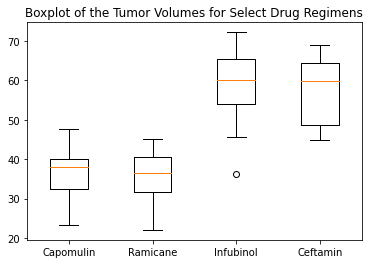

In [55]:
# Put treatments into a list for for loop (and later for plot labels)
# Drug Regimen was already put in a list in the previous part

# Create empty list to fill with tumor vol data (for plotting)
tumor_vol = []

# Calculate the IQR and quantitatively determine if there are any potential outliers. 
for reg in regimen_list:
    
    # Locate the rows which contain mice on each drug and get the tumor volumes
    spec_reg_df = max_tp_df.loc[max_tp_df['Drug Regimen'] == reg]
    
    # add subset 
    tumor_vol.append(spec_reg_df[['Mouse ID', 'Tumor Volume (mm3)']])
    
    # Determine outliers using upper and lower bounds
    quartiles = spec_reg_df['Tumor Volume (mm3)'].quantile([0.25,0.5,0.75])
    lower_q = quartiles[.25]
    upper_q = quartiles[.75]
    iqr = upper_q - lower_q
    lower_bound = lower_q - (1.5*iqr)
    upper_bound = upper_q + (1.5*iqr)
    outliers_volume = spec_reg_df.loc[(max_tp_df['Tumor Volume (mm3)'] > upper_bound) | (max_tp_df['Tumor Volume (mm3)'] < lower_bound)]
    if len(outliers_volume) > 0:
        print(f'The outliers for the {reg} regimen are:\n {outliers_volume}')
    else:
        print(f'The {reg} regimen has no identifiable outliers')
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest
fig, ax = plt.subplots()
ax.boxplot([tumor_vol[0]['Tumor Volume (mm3)'], tumor_vol[1]['Tumor Volume (mm3)'], tumor_vol[2]['Tumor Volume (mm3)'], tumor_vol[3]['Tumor Volume (mm3)']])
ax.set_xticklabels(regimen_list)
ax.set_title("Boxplot of the Tumor Volumes for Select Drug Regimens")
plt.show()

## Line and Scatter Plots

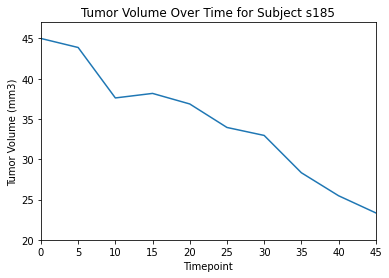

In [21]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin
capo_df = mouse_study_clean.loc[mouse_study_clean['Drug Regimen'] == 'Capomulin']
spec_mouse_df = capo_df.loc[capo_df['Mouse ID'] == capo_df['Mouse ID'].values[0]]
plt.plot(spec_mouse_df['Timepoint'], spec_mouse_df['Tumor Volume (mm3)'])
plt.title(f'Tumor Volume Over Time for Subject {capo_df["Mouse ID"].values[0]}')
plt.xlabel('Timepoint')
plt.ylabel('Tumor Volume (mm3)')
plt.xlim(0,spec_mouse_df['Timepoint'].max())
plt.ylim(20, spec_mouse_df['Tumor Volume (mm3)'].max() + 2)
plt.show()

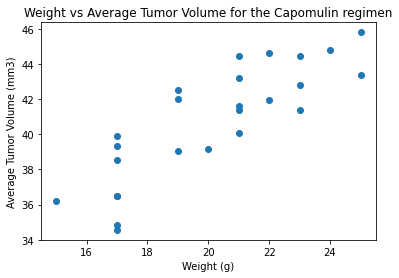

In [16]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen
capo_avg_df = capo_df.groupby(['Mouse ID']).mean()
capo_avg_df
plt.scatter(capo_avg_df['Weight (g)'], capo_avg_df['Tumor Volume (mm3)'])
plt.xlabel('Weight (g)')
plt.ylabel('Average Tumor Volume (mm3)')
plt.title('Weight vs Average Tumor Volume for the Capomulin regimen')
plt.show()

## Correlation and Regression

The r-squared is: 0.7088568047708723


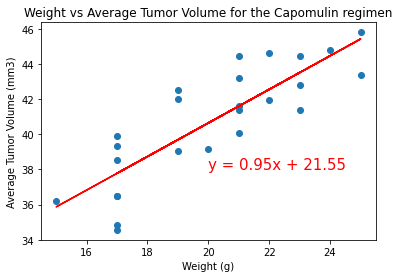

In [19]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen
(slope, intercept, rvalue, pvalue, stderr) = st.linregress(capo_avg_df['Weight (g)'],capo_avg_df['Tumor Volume (mm3)'])
regress_values = capo_avg_df['Weight (g)'] * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(capo_avg_df['Weight (g)'],capo_avg_df['Tumor Volume (mm3)'])
plt.plot(capo_avg_df['Weight (g)'],regress_values,"r-")
plt.annotate(line_eq,(20,38),fontsize=15,color="red")
plt.xlabel('Weight (g)')
plt.ylabel('Average Tumor Volume (mm3)')
plt.title('Weight vs Average Tumor Volume for the Capomulin regimen')
print(f"The r-squared is: {rvalue**2}")
plt.show()